# Sympy [1] - Symbolic Python

https://docs.sympy.org/latest/index.html

https://github.com/sympy/sympy/wiki

1. Meurer A, Smith CP, Paprocki M, Čertík O, Kirpichev SB, Rocklin M, Kumar A, Ivanov S, Moore JK, Singh S, Rathnayake T, Vig S, Granger BE, Muller RP, Bonazzi F, Gupta H, Vats S, Johansson F, Pedregosa F, Curry MJ, Terrel AR, Roučka Š, Saboo A, Fernando I, Kulal S, Cimrman R, Scopatz A. (2017) SymPy: symbolic computing in Python. PeerJ Computer Science 3:e103 https://doi.org/10.7717/peerj-cs.103

<!-- @article{10.7717/peerj-cs.103,
 title = {SymPy: symbolic computing in Python},
 author = {Meurer, Aaron and Smith, Christopher P. and Paprocki, Mateusz and \v{C}ert\'{i}k, Ond\v{r}ej and Kirpichev, Sergey B. and Rocklin, Matthew and Kumar, AMiT and Ivanov, Sergiu and Moore, Jason K. and Singh, Sartaj and Rathnayake, Thilina and Vig, Sean and Granger, Brian E. and Muller, Richard P. and Bonazzi, Francesco and Gupta, Harsh and Vats, Shivam and Johansson, Fredrik and Pedregosa, Fabian and Curry, Matthew J. and Terrel, Andy R. and Rou\v{c}ka, \v{S}t\v{e}p\'{a}n and Saboo, Ashutosh and Fernando, Isuru and Kulal, Sumith and Cimrman, Robert and Scopatz, Anthony},
 year = 2017,
 month = jan,
 keywords = {Python, Computer algebra system, Symbolics},
 abstract = {
            SymPy is an open source computer algebra system written in pure Python. It is built with a focus on extensibility and ease of use, through both interactive and programmatic applications. These characteristics have led SymPy to become a popular symbolic library for the scientific Python ecosystem. This paper presents the architecture of SymPy, a description of its features, and a discussion of select submodules. The supplementary material provide additional examples and further outline details of the architecture and features of SymPy.
         },
 volume = 3,
 pages = {e103},
 journal = {PeerJ Computer Science},
 issn = {2376-5992},
 url = {https://doi.org/10.7717/peerj-cs.103},
 doi = {10.7717/peerj-cs.103}
} -->

In [ ]:
import sympy

## Number representation

In [ ]:
sympy.sqrt(7)

In [ ]:
sympy.Float(9/4)

In [ ]:
sympy.Integer(9/4) ## drops the fractional part

In [ ]:
sympy.Rational(9/4)

## Defining variables (i.e. symbols)

In [ ]:
x, y, z, t = sympy.symbols('x y z t')

## Expresssions

- `sympify`: converts a string to a sympy function

In [ ]:
function_string = "x**2+3*x+2"
function_sympy = sympy.sympify(function_string)

## Equivalent statement
# function_sympy = sympy.sympify("x**2+3*x+2")

function_sympy

In [ ]:
sympy.sympify("2/3 + 1/6", evaluate=False)

In [ ]:
sympy.sympify("2/3 + 1/6", evaluate=True)

#### Evaluate an expression or function

The following two are equivalent:
- `evalf()`
- `N()`

In [ ]:
sympy.sqrt(7)*sympy.pi

In [ ]:
(sympy.sqrt(7)*sympy.pi).evalf()

In [ ]:
sympy.N(sympy.sqrt(7)*sympy.pi)

In [ ]:
sympy.sympify("2/3 + 1/6").evalf()

In [ ]:
sympy.N(sympy.sympify("2/3 + 1/6"))

## Polynomials

#### Two coefficients: [M, N] --> $Mx + N$
- Note how the M shifts to the x

In [ ]:
sympy.poly(4*x + 2)

In [ ]:
polynomial_1_degree = sympy.poly(4*x + 2)
polynomial_1_degree

#### Three coefficients: [M, N, O] --> $Mx^2 + Nx + O$

In [ ]:
polynomial_2_degree = sympy.poly(-4*x**2 + 1*x -2)
polynomial_2_degree

Print the degree:

In [ ]:
sympy.degree(-4*x**2 + 1*x -2)

In [ ]:
sympy.degree(polynomial_2_degree)

Evaluate the polynomial

Simple (works for a single variable)

In [ ]:
polynomial_2_degree(2)

Better (works always) - substitute the variable

In [ ]:
polynomial_2_degree.subs(x, 2)

In [ ]:
polynomial_2_degree.subs(x, 3)

### Expanding a polynomial

Notice: we are not specifying the poly in front now.

In [ ]:
polynomial = (-4*x**2 + 1*x -2)**2
polynomial

In [ ]:
polynomial.expand()

In [ ]:
polynomial

### Factor a polynomial

In [ ]:
(16*x**4 - 8*x**3 + 17*x**2 - 4*x + 4).factor()

### Multiply two polynomials together

In [ ]:
polynomial_1_degree * polynomial_2_degree

### Multiple variables

In [ ]:
poly_multi_var = ((x**2 + y**2)/z)
poly_multi_var

Evaluate

In [ ]:
poly_multi_var.subs([(x, 1), (y, 2), (z, 3)])

To obtain a float, use `evalf`

Note how the variable values are passed as a dictionary.

In [ ]:
poly_multi_var.evalf(subs = {x: 1, y: 2, z: 3})

## Calculus

### Derivatives
First derivative

In [ ]:
polynomial = 2*x**3 + 1
polynomial

In [ ]:
polynomial.diff(x)

Second derivative

In [ ]:
polynomial.diff(x, 2)

### Integration

Indefinite integral

In [ ]:
polynomial

In [ ]:
polynomial.integrate(x)

Definate integral

Notice: the tuple being passed (i.e. `(x, 1 ,2)`)

In [ ]:
polynomial.integrate((x, 1, 2))

## Visualizing functions (i.e. plotting)

- backend: matplotlib

In [ ]:
sympy.plot(x**2 + 20)

Change the x-axis range:

In [ ]:
sympy.plot(x**2 + 20, (x, -2, 2))

In [ ]:
function = x**4
plot_1 = sympy.plot(function)
plot_2 = sympy.plot(polynomial.diff(x, 1))

## Solving equations

- Finding the "roots" of the equation (i.e. what the variable values are that sets the equation to zero).

Equation:

$x^2 = 4$

Rearrange:

$x^2 -4 = 0$

Solve:

Solutions are
1. x = 2
1. x = -2

In [ ]:
solutions = sympy.solve(x**2 - 4)
solutions

In [ ]:
solutions[0]

### Misc Sympy functions

Lambdify: https://docs.sympy.org/latest/modules/utilities/lambdify.html
    - transforma a sympy expression to a lambda function, which can be used to evaluate (solve) equations

In [ ]:
function = x**2

derivative_function = function.diff(x)
derivative_function

In [ ]:
f1 = sympy.lambdify(x, derivative_function)

In [ ]:
f1(3)

In [ ]:
multi_var_func = (x**2 + y**3 + z**4)

List the variables

In [ ]:
multi_var_func.free_symbols

To obtain an integer:

In [ ]:
f = sympy.lambdify([x, y, z], multi_var_func)

f(1, 2, 3)

In [ ]:
type(f(1, 2, 3))

To obtain a `sympy.core.numbers.Integer`:

In [ ]:
multi_var_func.subs([(x, 1), (y, 2), (z, 3)])

In [ ]:
type(multi_var_func.subs([(x, 1), (y, 2), (z, 3)]))

To obtain a `sympy.core.numbers.Float`:

In [ ]:
multi_var_func.evalf(subs = {x: 1, y: 2, z: 3})

In [ ]:
type(multi_var_func.evalf(subs = {x: 1, y: 2, z: 3}))

`simplify`

In [ ]:
expr = sympy.functions.sin(x)**2 + sympy.functions.cos(x)**2 
sympy.simplify(expr)

`expand`

In [ ]:
a, b = sympy.symbols('a b') 
sympy.expand((a + b)**2)

#### Unit Conversions

In [ ]:
from sympy.physics.units import convert_to
from sympy.physics.units import speed_of_light
from sympy.physics.units import kilometer, meter, centimeter, millimeter 
from sympy.physics.units import second, minute, hour

In [ ]:
speed_of_light

In [ ]:
speed_of_light.evalf()

To obtain a value, you must specify the desired units:

In [ ]:
convert_to(speed_of_light, [meter, minute])

In [ ]:
convert_to(speed_of_light, [millimeter, hour])

In [ ]:
#help(sympy.physics.units)

#### Constants built into SymPy
1. A: ampere
1. Bq: becquerel
1. C: coulomb
1. D: dioptre
1. F: farad
1. G: gravitational_constant
1. Gy: gray
1. H: henry
1. Hz: hertz
1. J: joule
1. K: kelvin
1. N: newton
1. Pa: pascal
1. R: molar_gas_constant
1. S: siemens
1. T: tesla
1. V: volt
1. W: watt
1. Wb: weber
1. Z0: vacuum_impedance
1. __all__: ['Dimension', 'DimensionSystem', 'UnitSystem', 'convert_to',...
1. acceleration: Dimension(acceleration)
1. acceleration_due_to_gravity: acceleration_due_to_gravity
1. action: Dimension(action, A)
1. amount: Dimension(amount_of_substance)
1. amount_of_substance: Dimension(amount_of_substance)
1. ampere: ampere
1. amperes: ampere
1. amu: atomic_mass_constant
1. amus: atomic_mass_constant
1. angular_mil: angular_mil
1. angular_mils: angular_mil
1. anomalistic_year: anomalistic_year
1. anomalistic_years: anomalistic_year
1. astronomical_unit: astronomical_unit
1. astronomical_units: astronomical_unit
1. atm: atmosphere
1. atmosphere: atmosphere
1. atmospheres: atmosphere
1. atomic_mass_constant: atomic_mass_constant
1. atomic_mass_unit: atomic_mass_constant
1. atto: Prefix('atto', 'a', -18)
1. au: astronomical_unit
1. avogadro: avogadro_constant
1. avogadro_constant: avogadro_constant
1. avogadro_number: avogadro_number
1. bar: bar
1. bars: bar
1. becquerel: becquerel
1. bit: bit
1. bits: bit
1. boltzmann: boltzmann_constant
1. boltzmann_constant: boltzmann_constant
1. byte: byte
1. c: speed_of_light
1. candela: candela
1. candelas: candela
1. capacitance: Dimension(capacitance)
1. cd: candela
1. centi: Prefix('centi', 'c', -2)
1. centiliter: centiliter
1. centiliters: centiliter
1. centimeter: centimeter
1. centimeters: centimeter
1. charge: Dimension(charge, Q)
1. cl: centiliter
1. cm: centimeter
1. common_year: common_year
1. common_years: common_year
1. conductance: Dimension(conductance, G)
1. coulomb: coulomb
1. coulomb_constant: coulomb_constant
1. coulombs: coulomb
1. current: Dimension(current, I)
1. dHg0: 13.5951
1. day: day
1. days: day
1. deca: Prefix('deca', 'da', 1)
1. deci: Prefix('deci', 'd', -1)
1. deciliter: deciliter
1. deciliters: deciliter
1. decimeter: decimeter
1. decimeters: decimeter
1. deg: degree
1. degree: degree
1. degrees: degree
1. dioptre: dioptre
1. dl: deciliter
1. dm: decimeter
1. draconic_year: draconic_year
1. draconic_years: draconic_year
1. e0: vacuum_permittivity
1. eV: electronvolt
1. electric_constant: vacuum_permittivity
1. electric_force_constant: coulomb_constant
1. electronvolt: electronvolt
1. electronvolts: electronvolt
1. elementary_charge: elementary_charge
1. energy: Dimension(energy, E)
1. exa: Prefix('exa', 'E', 18)
1. exbi: Prefix('exbi', 'Y', 60, 2)
1. exbibyte: exbibyte
1. exbibytes: exbibyte
1. farad: farad
1. faraday_constant: faraday_constant
1. farads: farad
1. feet: foot
1. femto: Prefix('femto', 'f', -15)
1. foot: foot
1. force: Dimension(force, F)
1. frequency: Dimension(frequency, f)
1. ft: foot
1. full_moon_cycle: full_moon_cycle
1. full_moon_cycles: full_moon_cycle
1. g: gram
1. gaussian_year: gaussian_year
1. gaussian_years: gaussian_year
1. gee: acceleration_due_to_gravity
1. gees: acceleration_due_to_gravity
1. gibi: Prefix('gibi', 'Y', 30, 2)
1. gibibyte: gibibyte
1. gibibytes: gibibyte
1. giga: Prefix('giga', 'G', 9)
1. gram: gram
1. grams: gram
1. gravitational_constant: gravitational_constant
1. gray: gray
1. h: hour
1. hbar: hbar
1. hecto: Prefix('hecto', 'h', 2)
1. henry: henry
1. henrys: henry
1. hertz: hertz
1. hour: hour
1. hours: hour
1. hz: hertz
1. impedance: Dimension(impedance, Z)
1. inch: inch
1. inches: inch
1. inductance: Dimension(inductance)
1. josephson_constant: josephson_constant
1. joule: joule
1. joules: joule
1. julian_year: julian_year
1. julian_years: julian_year
1. kPa: kilopascal
1. kat: katal
1. katal: katal
1. kelvin: kelvin
1. kelvins: kelvin
1. kg: kilogram
1. kibi: Prefix('kibi', 'Y', 10, 2)
1. kibibyte: kibibyte
1. kibibytes: kibibyte
1. kilo: Prefix('kilo', 'k', 3)
1. kilogram: kilogram
1. kilograms: kilogram
1. kilometer: kilometer
1. kilometers: kilometer
1. km: kilometer
1. l: liter
1. length: Dimension(length, L)
1. lightyear: lightyear
1. lightyears: lightyear
1. liter: liter
1. liters: liter
1. luminosity: Dimension(luminous_intensity)
1. luminous_intensity: Dimension(luminous_intensity)
1. lux: lux
1. lx: lux
1. ly: lightyear
1. m: meter
1. magnetic_constant: magnetic_constant
1. magnetic_density: Dimension(magnetic_density, B)
1. magnetic_flux: Dimension(magnetic_flux)
1. magnetic_flux_density: Dimension(magnetic_density, B)
1. mass: Dimension(mass, M)
1. mebi: Prefix('mebi', 'Y', 20, 2)
1. mebibyte: mebibyte
1. mebibytes: mebibyte
1. mega: Prefix('mega', 'M', 6)
1. meter: meter
1. meters: meter
1. mg: milligram
1. mho: siemens
1. mhos: siemens
1. mi: mile
1. micro: Prefix('micro', 'mu', -6)
1. microgram: microgram
1. micrograms: microgram
1. micrometer: micrometer
1. micrometers: micrometer
1. micron: micrometer
1. microns: micrometer
1. microsecond: microsecond
1. microseconds: microsecond
1. mil: angular_mil
1. mile: mile
1. miles: mile
1. milli: Prefix('milli', 'm', -3)
1. milli_mass_unit: milli_mass_unit
1. milligram: milligram
1. milligrams: milligram
1. milliliter: milliliter
1. milliliters: milliliter
1. millimeter: millimeter
1. millimeters: millimeter
1. millisecond: millisecond
1. milliseconds: millisecond
1. minute: minute
1. minutes: minute
1. ml: milliliter
1. mm: millimeter
1. mmHg: mmHg
1. mmu: milli_mass_unit
1. mmus: milli_mass_unit
1. mol: mole
1. molar_gas_constant: molar_gas_constant
1. mole: mole
1. moles: mole
1. momentum: Dimension(momentum)
1. ms: millisecond
1. nano: Prefix('nano', 'n', -9)
1. nanometer: nanometer
1. nanometers: nanometer
1. nanosecond: nanosecond
1. nanoseconds: nanosecond
1. nautical_mile: nautical_mile
1. nautical_miles: nautical_mile
1. newton: newton
1. newtons: newton
1. nm: nanometer
1. nmi: nautical_mile
1. ns: nanosecond
1. ohm: ohm
1. ohms: ohm
1. optical_power: dioptre
1. pa: pascal
1. pascal: pascal
1. pascals: pascal
1. pebi: Prefix('pebi', 'Y', 50, 2)
1. pebibyte: pebibyte
1. pebibytes: pebibyte
1. percent: percent
1. percents: percent
1. permille: permille
1. peta: Prefix('peta', 'P', 15)
1. pico: Prefix('pico', 'p', -12)
1. picometer: picometer
1. picometers: picometer
1. picosecond: picosecond
1. picoseconds: picosecond
1. planck: planck
1. planck_acceleration: planck_acceleration
1. planck_angular_frequency: planck_angular_frequency
1. planck_area: planck_area
1. planck_charge: planck_charge
1. planck_current: planck_current
1. planck_density: planck_density
1. planck_energy: planck_energy
1. planck_energy_density: planck_energy_density
1. planck_force: planck_force
1. planck_impedance: planck_impedance
1. planck_intensity: planck_intensity
1. planck_length: planck_length
1. planck_mass: planck_mass
1. planck_momentum: planck_momentum
1. planck_power: planck_power
1. planck_pressure: planck_pressure
1. planck_temperature: planck_temperature
1. planck_time: planck_time
1. planck_voltage: planck_voltage
1. planck_volume: planck_volume
1. pm: picometer
1. pound: pound
1. pounds: pound
1. power: Dimension(power)
1. pressure: Dimension(pressure)
1. ps: picosecond
1. psi: psi
1. quart: quart
1. quarts: quart
1. rad: radian
1. radian: radian
1. radians: radian
1. s: second
1. second: second
1. seconds: second
1. sidereal_year: sidereal_year
1. sidereal_years: sidereal_year
1. siemens: siemens
1. speed: Dimension(velocity)
1. speed_of_light: speed_of_light
1. sr: steradian
1. stefan: stefan_boltzmann_constant
1. stefan_boltzmann_constant: stefan_boltzmann_constant
1. steradian: steradian
1. steradians: steradian
1. tebi: Prefix('tebi', 'Y', 40, 2)
1. tebibyte: tebibyte
1. tebibytes: tebibyte
1. temperature: Dimension(temperature, T)
1. tera: Prefix('tera', 'T', 12)
1. tesla: tesla
1. teslas: tesla
1. time: Dimension(time, T)
1. torr: mmHg
1. tropical_year: tropical_year
1. tropical_years: tropical_year
1. u0: magnetic_constant
1. ug: microgram
1. um: micrometer
1. us: microsecond
1. v: volt
1. vacuum_impedance: vacuum_impedance
1. vacuum_permeability: magnetic_constant
1. vacuum_permittivity: vacuum_permittivity
1. velocity: Dimension(velocity)
1. volt: volt
1. voltage: Dimension(voltage, U)
1. volts: volt
1. volume: Dimension(volume)
1. von_klitzing_constant: von_klitzing_constant
1. watt: watt
1. watts: watt
1. wb: weber
1. weber: weber
1. webers: weber
1. yard: yard
1. yards: yard
1. yd: yard
1. year: tropical_year
1. years: tropical_year
1. yocto: Prefix('yocto', 'y', -24)
1. yotta: Prefix('yotta', 'Y', 24)
1. zepto: Prefix('zepto', 'z', -21)
1. zetta: Prefix('zetta', 'Z', 21)

# Homework 1

If a particle iis moving in space with a velocity function of $v(t) = t^2 - 2t - 8$ where t is in seconds 
and the velocity is measured in meters/second:

1. Plot the function.
2. At what time(s) is the particle at rest (i.e. $v(t) = 0$)? 
3. What is the acceleration of the particle at a time of 5.3 seconds into its trajectory? (Hint: acceleration is the first derivative of the velocity)

Source: https://www.georgebrown.ca/sites/default/files/2020-05/Applications%20of%20Derivatives.pdf

In [ ]:
t = sympy.symbols('t')
velocity_function = t**2 - 2*t - 8

In [ ]:
plot_velocity = sympy.plot(velocity_function)

1. At what time(s) is the particle at rest (i.e. $v(t) = 0$)?
    - That means we need to find the roots of the equation.

In [ ]:
solutions = sympy.solve(velocity_function)
solutions

However, since a negative time is not possible, the answer to the question is 4 seconds.

2. What is the acceleration of the particle at t=3 seconds?
    - The acceleration is the first derivative of the velecity

In [ ]:
first_derivative = velocity_function.diff(t, 1)
first_derivative

In [ ]:
acceleration_3s = first_derivative.evalf(subs = {t: 5.3})
acceleration_3s

In [ ]:
f'The acceleration of the particle at 3.0 seconds into its trajectory is {acceleration_3s:0.1f} m/s.'

---
## Homework 2
A soccer ball that is kicked into the air has its position (units: meters) described by the following equation:
    $x(t) = -4.9t^2 + 9.8t + 5$, where t is time (units: seconds).
    
1. Plot the equation that describes the soccer ball's position as a function of time
2. At what time (using 3 significant figures) will the ball land?
3. How many meters above ground was the ball kicked? 
4. What is the maximum height the ball will reach and at what time will this occur? 
5. What is the acceleration of the ball at t=3 s? 
    
Source: https://www.georgebrown.ca/sites/default/files/2020-05/Applications%20of%20Derivatives.pdf

In [ ]:
t = sympy.symbols('t')
position_function = -4.9*t**2 +9.8*t + 0.3

In [ ]:
plot_position = sympy.plot(position_function, (t, 0, 2))

2. At what time will the ball land?
    - This will occur when $x(t) = 0$, so find the roots of the equation

In [ ]:
solutions = sympy.solve(position_function)
solutions

Since a negative time does not make sense, the only solution is the other value.

In [ ]:
f'The ball will land after {solutions[1]:0.2f} seconds.'

3. How many meters above ground was the ball kicked?
    - This occurs at a time of zero (i.e. t=0)

In [ ]:
height_0t = position_function.evalf(subs = {t: 0})
f'The ball was kicked {height_0t:0.2f} meters above the ground.'

4. What is the maximum height the ball will reach and at what time will this occur?
    - This occurs when the acceleration is equal to zero.

In [ ]:
first_derivative = position_function.diff(t, 1)
first_derivative

In [ ]:
acceleration_0 = sympy.solve(first_derivative)
acceleration_0

In [ ]:
f"The maximum height occurs at {acceleration_0[0]:0.2f} seconds into the ball's flight"

Now that you know the time, put this value back into the original equation and solve:

In [ ]:
height_max = position_function.evalf(subs = {t: acceleration_0[0]})
height_max

In [ ]:
f'The maximum height the ball reaches after {acceleration_0[0]:0.2f} second is {height_max:0.2f} meters.'

5. What is the acceleration (with direction) of the ball at t=3 s?
    - The acceleration is the second derivative of the position (i.e. first derivative of the velocity)

In [ ]:
second_derivative = position_function.diff(t, 2)
second_derivative

The negative of the acceleration tells you that it is downward.

## Homework 3

#### van der Waals interaction
Atoms can be simulated using Newtonian physics. One of the strongest "nonbonded" (i.e. not covlently bonded) interactions between atoms is called the van der Waals interaction. 

The van der Waals interaction encompasses two forces:
- a long-range attractive London dispersion, and
- a short-range Pauli exclusion principle

One possible (and popular) mathematical function to model the van der Waals interaction is the Lennard-Jones **potential energy** model.

The **attractive London dispersion** potential energy ($V(r)$):

$V_{\text{attractive}}(r) = −4ε \left( \dfrac{σ}{r} \right)^6$

The **repulsive Pauli exlusion**:

$V_{\text{repulsive}}(r) = 4ε \left( \dfrac{σ}{r}\right)^{12}$

- σ: the distance where the potential energy (V) between the two particles is zero
- ε: the potential energy at the equilibrium separation
- r: the distance between the two atoms

---

Put these together for a **6-12 Lennard-Jones Potential Energy Function**:

$V_{LJ}(r) = 4ε \left[ \left( \dfrac {σ} {r}\right) ^{12}-\left( \dfrac {σ} {r}\right) ^{6}\right]$

The attractive term is a sixth-power dependency on the distance between the two bonded particles.

The repulsive term is a twelfth-power dependency on the distance.

---


### Force and Acceleration

To simulate how atoms (or molecules) move in time, one needs to compute the forces and acceleration. The starting point for this is Newton’s second law of motion:

$\mathbf{f}=m\mathbf{a}$

where $\mathbf{f}$ is the force vector on an atom of mass $m$, with an acceleration vector $\mathbf{a}$.

The force, $\mathbf{f}$, between two particles, at a distance $r$, can be found by taking the negative of the first derivative of of the potential energy with respect to the postion of the particles:

$f=−\frac{∂V(r)}{∂r}$.

First derivative the 6-12 Lennard-Jones Potential:

$V_{LJ} = 4ε \left[ \left( \dfrac {σ} {r}\right) ^{12}-\left( \dfrac {σ} {r}\right) ^{6}\right]$

$V_{LJ} = 4ε\left[ \left(\dfrac{σ}{r}\right)^{12} − \left(\dfrac{σ}{r}\right)^6\right]$

Simplify and rename variables (i.e. $A = σ^{12}$ and $B = σ^{6}$)

$V(r) = 4ε\left[ \left(\dfrac{A}{r^{12}}\right) − \left(\dfrac{B}{r^6}\right)\right]$

$\dfrac{\partial V(r)}{\partial r} = 4ε\left[-12 \left(\dfrac{A}{r^{13}} \right) − \left( -6\dfrac{B}{r^7} \right)\right]$

$\dfrac{\partial V(r)}{\partial r} = 24ε\left[-2 \left(\dfrac{A}{r^{13}} \right) +  \left(\dfrac{B}{r^7} \right)\right]$

$\dfrac{\partial V(r)}{\partial r} = \dfrac{24ε}{r}\left[-2 \left(\dfrac{A}{r^{12}} \right) + \left(\dfrac{B}{r^6} \right)\right]$

$\dfrac{\partial V(r)}{\partial r} = -\dfrac{24ε}{r} \left[ 2 \left( \dfrac{σ}{r} \right)^{12} - \left( \dfrac{σ}{r} \right) ^6 \right]$

<br><br><br>
Therefore, for **coding the force**:

$\mathbf{f} = - \dfrac{\partial V(r)}{\partial r} = 48ε \left( \dfrac{σ^{12}}{r^{13}} \right) - 24ε \left( \dfrac{σ^6}{r^7} \right)$

---

The Python code below creates a new function that is capable of calculating the force from the Lennard-Jones potential. The force on the atoms is then plotted.


#### Atomic system to simulate

$Ar_2$
- $\epsilon = 0.0103$
- $\sigma = 3.40$

In [ ]:
import numpy as np

r, sigma, epsilon = sympy.symbols('r sigma epsilon')

In [ ]:
lj_equation = (4 * epsilon * ((sigma / r)**12 - (sigma / r)**6))
lj_equation

In [ ]:
lj_equation_2der = - lj_equation.diff(r, 1)
lj_equation_2der

In [ ]:
sympy.expand(lj_equation_2der)

In [ ]:
sympy.simplify(lj_equation_2der)

In [ ]:
distances = np.linspace(3.5, 8.0, 100)
distances

In [ ]:
for dist in distances:
    F_LJ = lj_equation_2der.evalf(subs = {epsilon: 0.0103, sigma: 3.40, r: dist})
    print(f'{F_LJ:0.5f}')

## Homework 4

**Rayleigh-Jeans Law** (named after Lord Rayleigh of Britain) was an attempt to describe **intensity** (i.e. **energy output** or spectral radiance) of an **object** at all wavelengths.

The Rayleigh-Jeans Law can be expresed either as a function of the wavelength, or of the frequency:

1. Wavelength: $B_{\rm \lambda}(T) = \frac{2ckT}{\lambda^4}$


2. Frequency: $B_{\rm \nu}(T) = \frac{2{\nu}kT}{c^2}$

where $k_B$ is Boltzmann's constant, $c$ is the speed of light, $T$ is the temperature.

In [1]:
import sympy
from sympy.physics.units import boltzmann
from sympy.physics.units import convert_to
from sympy.physics.units import speed_of_light
from sympy.physics.units import nanometer, meter, kilogram, second, kelvin

lam, nu, k = sympy.symbols('lamda nu k')

In [2]:
boltzmann

boltzmann_constant

In [3]:
convert_to(boltzmann, [meter, kilogram, second, kelvin])

1.380649e-23*kilogram*meter**2/(kelvin*second**2)

In [4]:
k_b_nm = convert_to(boltzmann, [nanometer, kilogram, second, kelvin])
k = k_b_nm
k

1.380649e-5*kilogram*nanometer**2/(kelvin*second**2)

In [5]:
speed_of_light

speed_of_light

In [6]:
speed_of_light.is_constant()

True

In [7]:
c_nm = convert_to(speed_of_light, [nanometer, second])
c_nm

299792458000000000*nanometer/second

In [8]:
c_nm.is_constant()

True

In [9]:
temperature = 5000

In [10]:
rj_wave = 2*c_nm*k_b_nm*temperature/lam**4
rj_wave

4.13908157345242e+16*kilogram*nanometer**3/(kelvin*second**3*lamda**4)

In [11]:
rj_wave = 2*299792458000000000*1.380649E-5*temperature/lam**4
rj_wave

4.13908157345242e+16/lamda**4

In [12]:
rj_wave.free_symbols

{lamda}

In [13]:
wavelengths = range(1, 30, 1)


In [14]:
B_list = []
for length in wavelengths:
    B = rj_wave.evalf(subs = {lam: length})
    B_list.append(B)
    print(B)
B_list

4.13908157345242e+16
2.58692598340776e+15
510997725117583.
161682873962985.
66225305175238.7
31937357819848.9
17238990310089.2
10105179622686.6
6308613890340.53
4139081573452.42
2827048407521.63
1996084863740.56
1449207511450.03
1077436894380.58
817596360188.132
631573726417.911
495573756714.170
394288368146.283
317606646162.354
258692598340.776
212827040865.299
176690525470.102
147908332712.234
124755303983.785
105960488280.382
90575469465.6266
77884122102.9695
67339805898.7860
58521034404.3233


[4.13908157345242e+16,
 2.58692598340776e+15,
 510997725117583.,
 161682873962985.,
 66225305175238.7,
 31937357819848.9,
 17238990310089.2,
 10105179622686.6,
 6308613890340.53,
 4139081573452.42,
 2827048407521.63,
 1996084863740.56,
 1449207511450.03,
 1077436894380.58,
 817596360188.132,
 631573726417.911,
 495573756714.170,
 394288368146.283,
 317606646162.354,
 258692598340.776,
 212827040865.299,
 176690525470.102,
 147908332712.234,
 124755303983.785,
 105960488280.382,
 90575469465.6266,
 77884122102.9695,
 67339805898.7860,
 58521034404.3233]

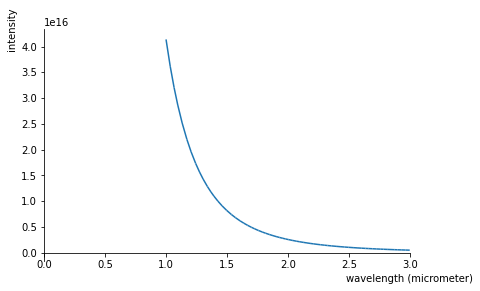

In [26]:
graph = sympy.plot(rj_wave, (lam, 1, 3),
           xlim= (0, 3), axis_center=(0.0, 0.0),
           ylabel='intensity', xlabel='wavelength (micrometer)')
graph

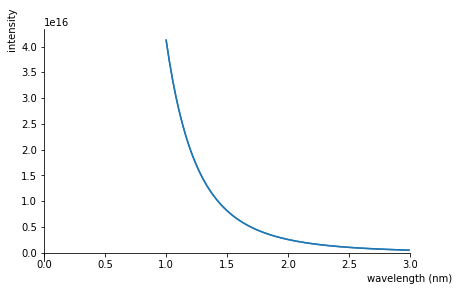

In [24]:
import matplotlib.pyplot as plt
backend = graph.backend(graph)
backend.process_series()
backend.plt.savefig('rj_wavelength.png', dpi=300)
backend.show()

In [17]:
from IPython.display import display, Latex
from sympy import *
import sympy.physics.units as U
c = U.speed_of_light
G = U.gravitational_constant
hb = U.hbar

In [ ]:
help(U)

In [ ]:
U.convert_to(sqrt(hb*G/(c**3)), U.SI._base_units).evalf()